## Рабочая тетрадь № 8

### Теоретический материал — Кластеризация

Кластеризация — разбиение множества объектов на подмножества, называемые **кластерами**.  
Кластеризация, будучи математическим алгоритмом, имеет широкое применение во многих сферах: начиная с таких естественнонаучных областей как биология и физиология, и заканчивая маркетингом в социальных сетях и поисковой оптимизацией.

Цель — разделить данные таким образом, чтобы точки, находящиеся в одном и том же кластере, были очень схожи друг с другом, а точки, находящиеся в разных кластерах, отличались друг от друга.

Как и алгоритмы классификации, алгоритмы кластеризации присваивают (или прогнозируют) каждой точке данных номер кластера, к которому она принадлежит.

---

### Задача кластеризации относится к широкому классу задач обучения без учителя.

Кластеризация применяют для анализа и поиска признаков, по которым можно объединить объекты, сжатия данных и поиска новизны (что не входит ни в один кластер).

В чем отличие классификации и кластеризации:
- При классификации у вас есть набор предопределённых классов — вы обучаете ИИ на наборе примеров и потом хотите знать, к какому классу принадлежит новый объект.
- При кластеризации вы используете алгоритм, который пытается группировать набор объектов и определить, существует ли какая-либо взаимосвязь между объектами.

---

### Метод k-средних

Кластеризация **k-средних** — один из самых простых и наиболее используемых алгоритмов кластеризации.

1. Сначала выбирается число кластеров `k`.
2. После выбора значения `k` алгоритм k-средних отбирает точки, которые будут представлять центры кластеров (**cluster centers**).
3. Затем для каждой точки данных вычисляется его евклидово расстояние до каждого центра кластера. Каждая точка назначается ближайшему центру кластера.
4. Алгоритм вычисляет **центроиды (centroids)** — центры тяжести кластеров.  
   Каждый центроид — это вектор, элементы которого представляют собой средние значения характеристик, вычисленные по всем точкам кластера.
5. Центр кластера смещается в его центроид.
6. Точки заново назначаются ближайшему центру кластера.

Этапы изменения центров кластеров и переназначения точек итеративно повторяются до тех пор, пока границы кластеров и расположение центроидов не перестанут изменяться, т.е. на каждой итерации в каждый кластер будут попадать одни и те же точки данных.

Алгоритм **k-средних** — наверное, самый популярный и простой алгоритм кластеризации, и очень легко представляется в виде простого псевдокода:

1. Выбрать количество кластеров `k`, которое нам кажется оптимальным для наших данных.
2. Высыпать случайным образом в пространство наших данных `k` точек (центроидов).
3. Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.
4. Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.
5. Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не «сойдутся» (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).

> *Примечание:*  
> Стоит заметить, что можно рассчитывать расстояние между центроидами по любой метрике — Евклидовой, Хемминговой и т.д.  
> По умолчанию используется **Евклидово расстояние**.

---

Сгенерируем 2D-набор данных, содержащий 4 разных больших объекта, а затем применим алгоритм k-средних, чтобы увидеть результат.

### Решение:

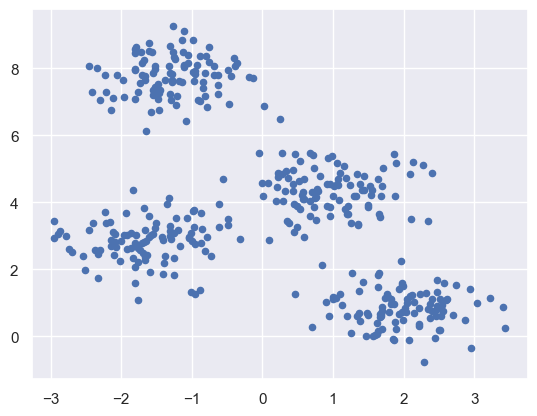

In [3]:
# Начнём с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.cluster import KMeans

# Сгенерируем данные
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

In [4]:
# Затем создаём объект KMeans вместе с указанием количества кластеров
# и обучаем модель и делаем прогноз следующим образом:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


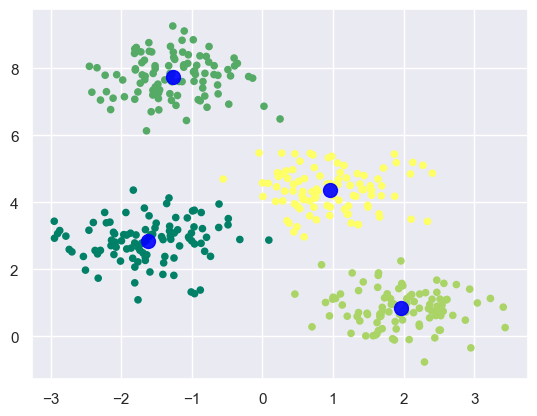

In [7]:
# Построим и визуализируем центры кластера, выбранные с помощью k-средних оценки Python

from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9)
plt.show()

## 1.1.1 Пример

### Задача:

Проведём кластеризацию **K-средних** к набору простых цифр.  
K-means попытается идентифицировать похожие цифры.

In [8]:
# Начнём с импорта необходимых пакетов
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

from sklearn.cluster import KMeans

# Загрузим набор цифр из sklearn
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [9]:
# Выполним кластеризацию
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


(10, 64)

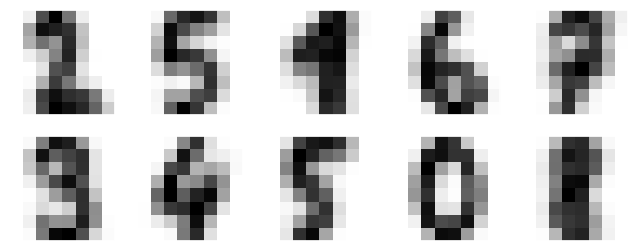

In [10]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

## Задание:

Дан массив данных:

```python
X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,45],
              [85,70],
              [71,80],
              [60,78],
              [55,52],
              [80,91]])
```
Требуется провести кластерный анализ данных методом k-средних.
Поэкспериментируйте с количеством кластеров.
### Решение:

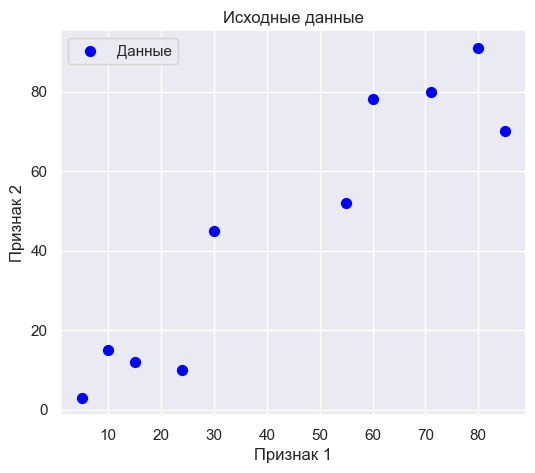

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


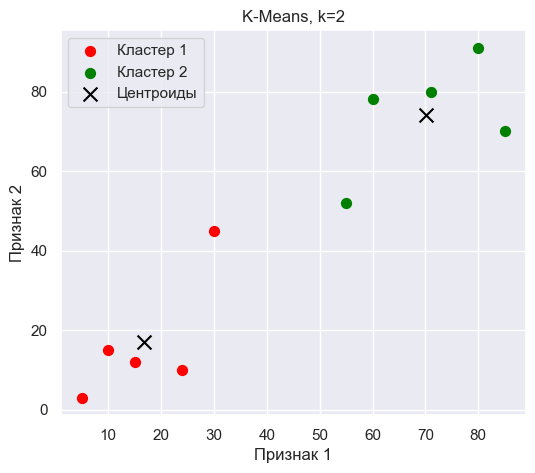

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


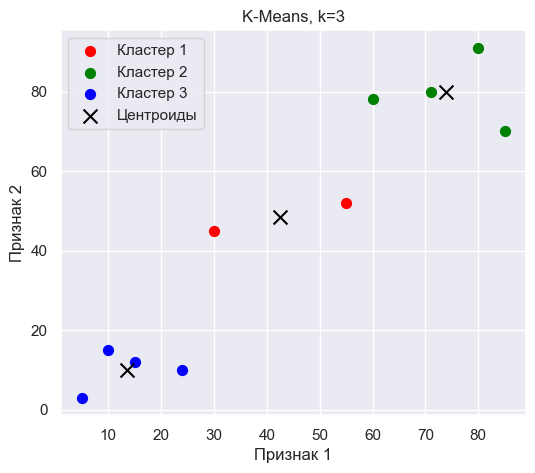

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


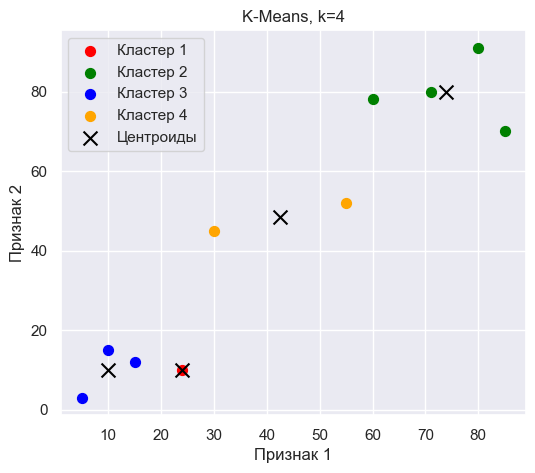

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

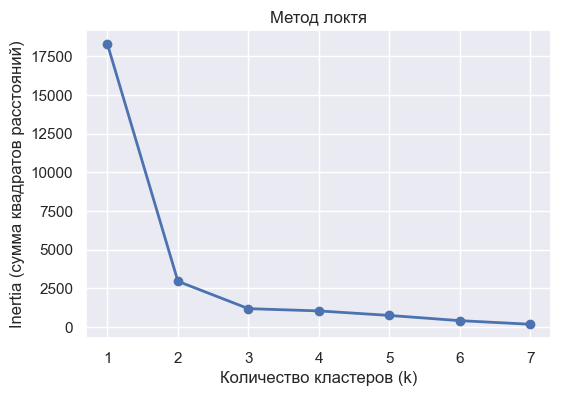

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = np.array([[5,3],
              [10,15],
              [15,12],
              [24,10],
              [30,45],
              [85,70],
              [71,80],
              [60,78],
              [55,52],
              [80,91]])

plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], s=50, c='blue', label='Данные')
plt.title('Исходные данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid(True)
plt.show()
# Цвета для кластеров
colors = ['red', 'green', 'blue', 'orange', 'purple']

for k in range(2, 5):  # k = 2, 3, 4
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    y_kmeans = kmeans.fit_predict(X)
    
    plt.figure(figsize=(6, 5))
    for i in range(k):
        plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                    s=50, c=colors[i], label=f'Кластер {i+1}')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=100, c='black', marker='x', label='Центроиды')
    plt.title(f'K-Means, k={k}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.legend()
    plt.grid(True)
    plt.show()
inertias = []
K_range = range(1, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, 'bo-', linewidth=2)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia (сумма квадратов расстояний)')
plt.grid(True)
plt.show()

## Задание:
Выполните кластеризацию для набора данных ирисов Фишера. Выполните
предсказания для модели. Поэкспериментируйте с количеством кластеров.
### Решение:

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score

iris = datasets.load_iris()
X = iris.data          # признаки (4D)
y_true = iris.target   # истинные метки (0, 1, 2)

print("Форма данных:", X.shape)
print("Классы:", iris.target_names)

Форма данных: (150, 4)
Классы: ['setosa' 'versicolor' 'virginica']


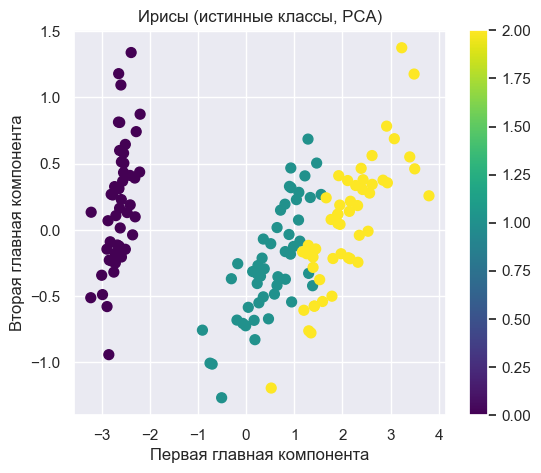

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=50)
plt.title('Ирисы (истинные классы, PCA)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


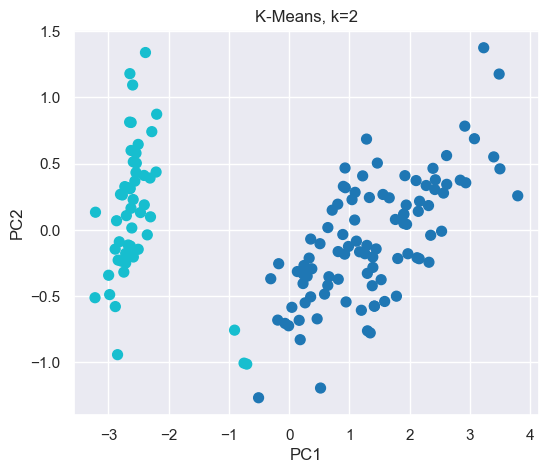

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


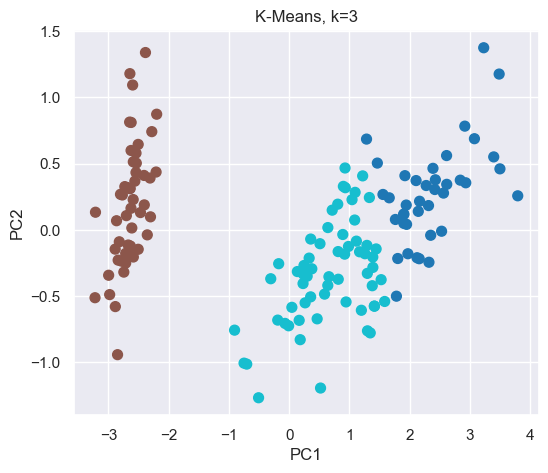

Индекс скорректированной случайной согласованности (ARI) при k=3: 0.716


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


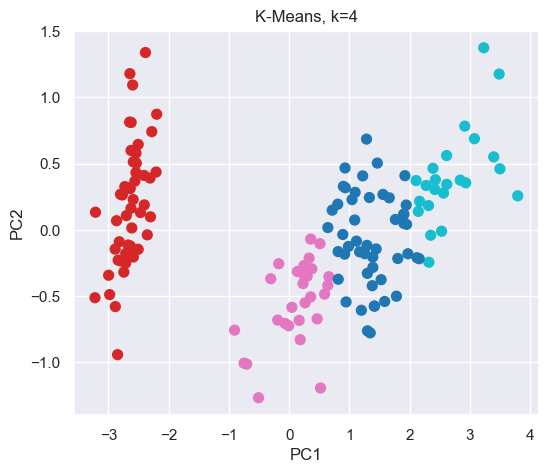

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


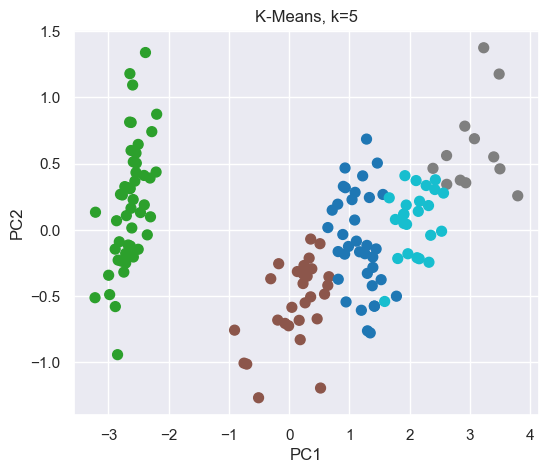

In [18]:
for k in [2, 3, 4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    y_pred = kmeans.fit_predict(X)
    plt.figure(figsize=(6, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='tab10', s=50)
    plt.title(f'K-Means, k={k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()
    if k == 3:
        ari = adjusted_rand_score(y_true, y_pred)
        print(f"Индекс скорректированной случайной согласованности (ARI) при k=3: {ari:.3f}")

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

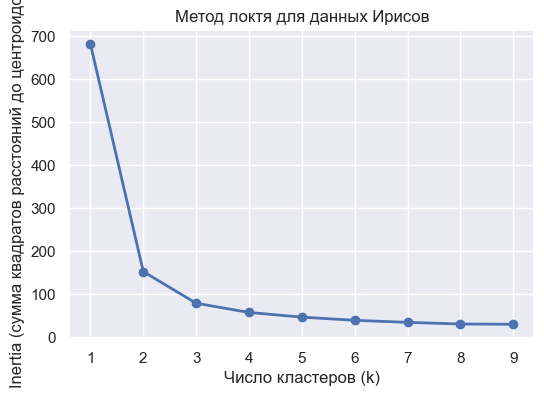

In [19]:
inertias = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, 'bo-', linewidth=2)
plt.title('Метод локтя для данных Ирисов')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Inertia (сумма квадратов расстояний до центроидов)')
plt.grid(True)
plt.show()

## Теоретический материал — Иерархическая кластеризация

Агломеративная кластеризация относится к семейству алгоритмов кластеризации, в основе которых лежат одинаковые принципы:  
алгоритм начинает свою работу с того, что каждую точку данных заносит в свой собственный кластер и по мере выполнения объединяет два наиболее схожих между собой кластера до тех пор, пока не будет удовлетворён определённый критерий остановки.  
Зачастую данным критерием выступает это количество кластеров, поэтому схожие между собой кластеры объединяются до тех пор, пока не останется заданное число кластеров.

---

Результатом агломеративной кластеризации является **иерархическая кластеризация**.  
Кластеризация выполняется итеративно, и каждая точка совершает путь от отдельной точки-кластера до участника итогового кластера.  
На каждом промежуточном шаге происходит кластеризация данных (с разным количеством кластеров).  
Иногда полезно сразу взглянуть на все возможные кластеризации.

Следующий пример показывает наложение всех возможных кластеризаций, показанных на рис., и даёт некоторое представление о том, как каждый кластер распадается на более мелкие кластеры.

### 1.1.2 Пример

 Построить дендрограмму для заданного массива данных.

### Решение:

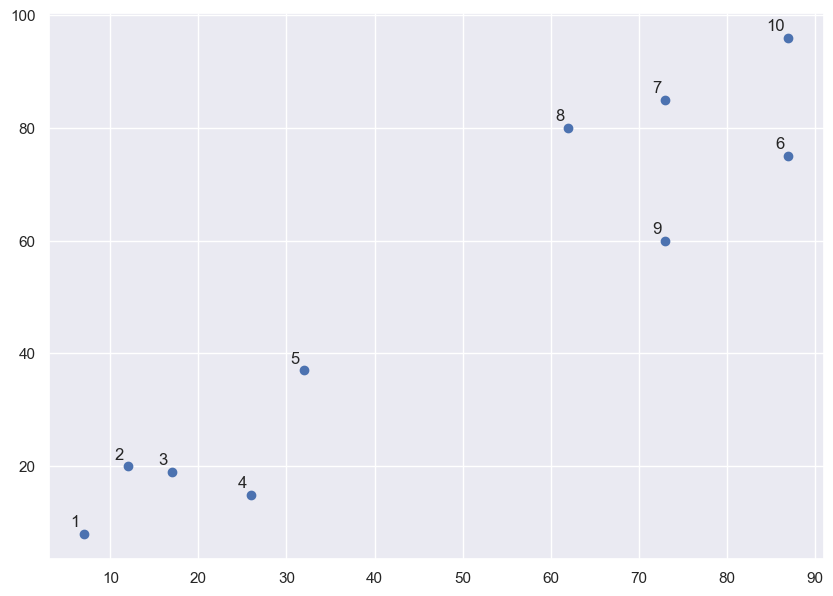

In [20]:
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[7,8], [12,20], [17,19], [26,15], [32,37], [87,75], [73,85], [62,80], [73,60], [87,96]])

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)

plt.scatter(X[:,0], X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')

plt.show()

### Далее построим дендрограмму для точек данных с помощью библиотеки Scipy

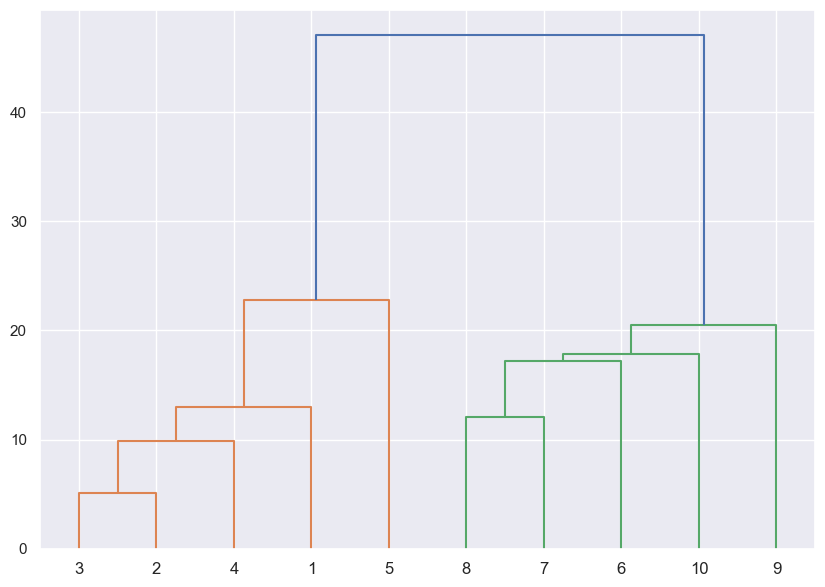

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')
labelist = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=labelist,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

Далее нам нужно импортировать класс для кластеризации и вызвать его метод `fit_predict` для прогнозирования кластера.

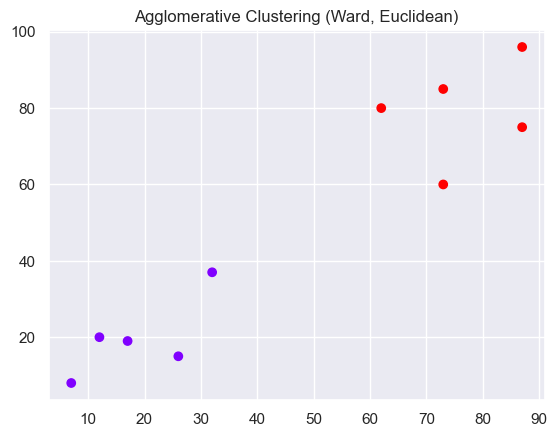

In [24]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

cluster = AgglomerativeClustering(
    n_clusters=2,
    metric='euclidean',
    linkage='ward'
)

cluster_labels = cluster.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Agglomerative Clustering (Ward, Euclidean)')
plt.show()

## Пример:

В этом примере мы выполним иерархическую кластеризацию реальных данных и посмотрим, как её можно использовать для решения реальной проблемы.  
Выполним кластеризацию данных по набору:  
[https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv](https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv)


### Задача, которую мы собираемся решить в этом разделе, состоит в том, чтобы разделить клиентов на разные группы в зависимости от их покупательских тенденций.


In [26]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Загрузим набор данных
url = "https://raw.githubusercontent.com/lucko515/clustering-python/master/Customer%20in%20Mall%20clusterng/Mall_Customers.csv"
customer_data = pd.read_csv(url)
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
customer_data.shape

(200, 5)

Наш набор данных состоит из пяти столбцов.  
Чтобы посмотреть результаты в двумерном пространстве, мы сохраним только два из них:  
- «Годовой доход» (в тысячах долларов)  
- «Оценка расходов» (1–100) — где 1 означает, что человек тратит деньги в торговом центре по шкале от 1 до 100, где 100 — это самый высокий расход.

Выполним следующий скрипт, чтобы отфильтровать первые три столбца из нашего набора данных:

In [29]:
data = customer_data.iloc[:, 3:5].values

Далее нам нужно заняться кластерами, на которые мы хотим разделить наши данные.
Мы снова будем использовать библиотеку `scipy` для создания дендрограммы:

<Figure size 5040x2160 with 0 Axes>

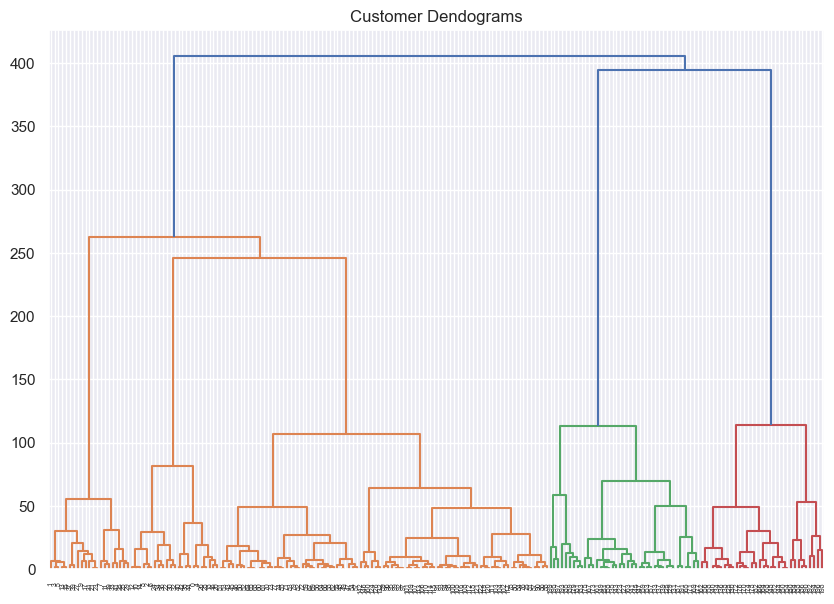

In [30]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(28, 12), dpi=180)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")

dend = shc.dendrogram(shc.linkage(data, method='ward'))

Если мы нарисуем горизонтальную линию, которая проходит через самое
длинное расстояние без горизонтальной линии, мы получим 5 кластеров.
Теперь мы знаем количество кластеров для нашего набора данных,
следующим шагом будет группировка точек данных в эти пять кластеров. 

Для этого мы снова воспользуемся классом `AgglomerativeClustering`
библиотеки `sklearn.cluster`.

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=5,
    metric='euclidean',  
    linkage='ward'
)
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

В качестве последнего шага давайте построим кластеры, чтобы увидеть, как
на самом деле были сгруппированы наши данные:


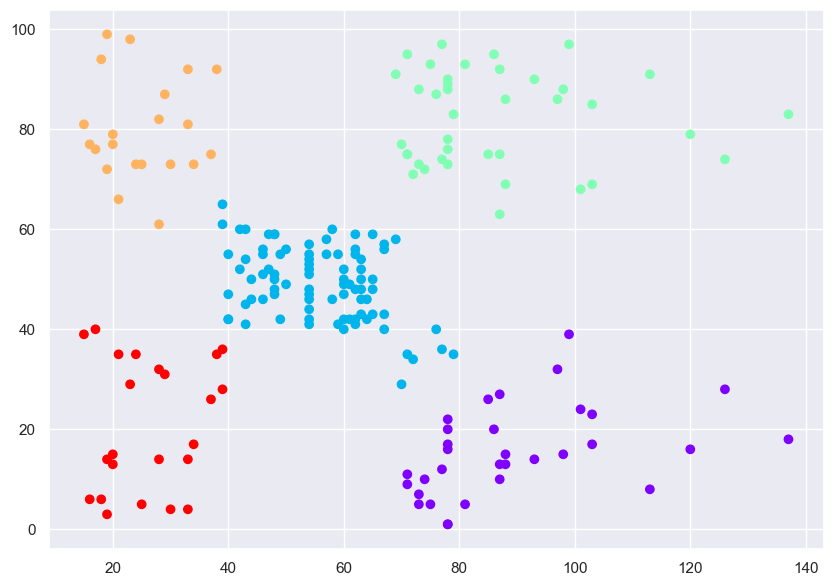

In [34]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

## Задача
Задание. Выполните иерархическую кластеризацию для набора данных об
ирисах Фишера. При этом необходимо использовать любые два признака
(всего их четыре).
### Решение:

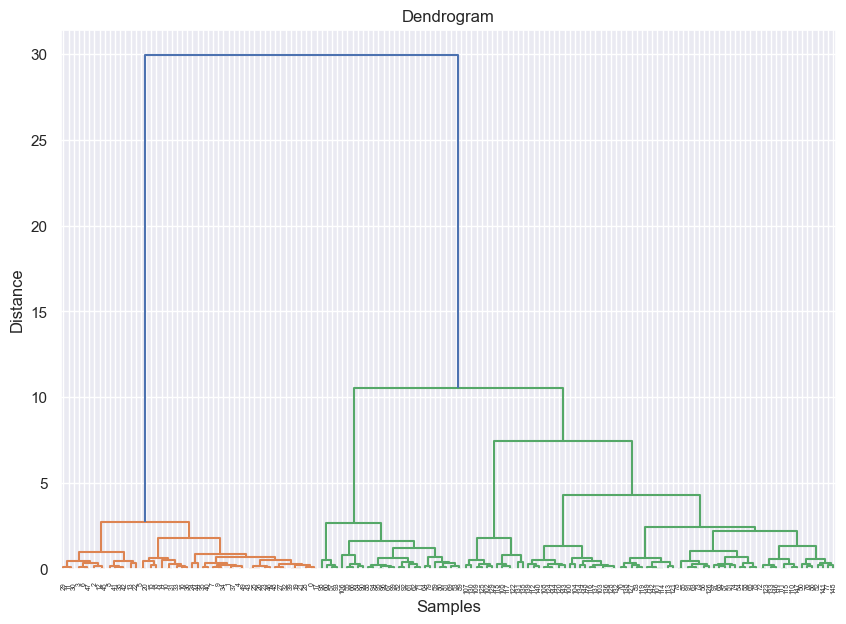

In [35]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

X = df[['sepal length (cm)', 'petal length (cm)']]

Z = linkage(X, 'ward')

plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()
